# ROC Curves and AUC 


## Introduction 

This lesson will introduce ROC: Receiver Operating Characteristic curves and AUC: Area Under [the] Curve.

Some of the accuracy scores you've encountered thus far probably seem pretty impressive; an 80% accuracy seems pretty darn good on the first try! What you have to keep in mind is that for binary classification, you are bound to be right sometimes, even just by random guessing. For example, a person should be roughly 50% accurate in guessing whether or not a coin lands on heads. This also can lead to issues when tuning models down the road. If you have a skewed dataset with rare events (such as a disease or winning the lottery) where there are only 2 positive cases in 1000, then even a trivial algorithm that classifies everything as 'not a member' will achieve an accuracy of 99.8% (998 out of 1000 times it was correct). So remember that an 80% accuracy must be taken into account in a larger context. AUC is an alternative comprehensive metric to confusion matrices, and ROC graphs allow us to determine optimal precision-recall tradeoff balances specific to the problem you are looking to solve.

## Objectives

You will be able to:

- Define ROC curves and AUC  
- Explain how ROC and AUC are used to evaluate and choose models 

## The ROC curve

The Receiver Operator Characteristic curve (ROC curve) illustrates the true positive rate against the false positive rate of our classifier.

You've already seen the True Positive Rate before, it's another name for **recall**! As a reminder, it's the ratio of the true positive predictions compared to all values that are actually positive. Mathematically, it is represented by:

$$ \text{TPR} = \frac{\text{TP}}{\text{TP}+\text{FN}} $$

False positive rate is the ratio of the false positive predictions compared to all values that are actually negative. Mathematically, it's represented as:

$$ \text{FPR} = \frac{\text{FP}}{\text{FP}+\text{TN}}$$

When training a classifier, the best performing models will have an ROC curve that hugs the upper left corner of the graph. A classifier with 50-50 accuracy is deemed 'worthless'; this is no better than random guessing, as in the case of a coin flip.

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/Image_144_ROC.png" width="400">

The ROC curve gives us a graph of the tradeoff between this false positive and true positive rate. The AUC, or area under the curve, gives us a singular metric to compare these. An AUC of 1 being a perfect classifier, and an AUC of 0.5 being that which has a precision of 50%.

Another perspective to help understand the ROC curve is to think about the underlying model fueling our classification algorithm. Remember that the logistic model produces probabilities that each observation is of a specific class. Imagine that the values produced from the logistic model look something like this:

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/Image_145_accuracy.png" alt="drawing" width="400px"/>

Here you see the majority of the two classes probabilities land at around 0.25 or 0.75. If we alter the cutoff point, it could sacrifice precision, increasing the false positive rate in order to also increase the true positive rate or vice versa. Imagine in this instance that green is the positive case 1 (in this case heart disease) and red the negative case 0. Shifting the decision boundary to the left from 0.5 will result in capturing more of the positive (1) cases. At the same time, it will pick up some false positives, those red cases at the far right of the negative (0) case distribution that will be incorrectly identified as being part of the positive case distribution.

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/Image_146_recall.png" alt="drawing" width="400px"/> 


Models with poor ROC might have large overlaps in the probability estimates for the two classes. This would indicate that the algorithm performed poorly and had difficulty separating the two classes from each other.

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/Image_147_separability.png" alt="drawing" width="400px"/>

With that, let's take a look at drawing the ROC curve in practice.

## Train a classifier

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
df = pd.read_csv('heart.csv')

# Define appropriate X and y
y = df['target']
X = df.drop(columns='target', axis=1)

# Normalize the Data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) # Preview model params

# Predict
y_hat_test = logreg.predict(X_test)

# Data preview
print("")
df.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Draw the ROC curve
  
In practice, a good way to implement AUC and ROC is via `sklearn`'s  built-in functions:

In [5]:
from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

# First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

From there it's easy to calculate the AUC:

In [6]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.8823114869626498


## Putting it all together as a cohesive visual

AUC: 0.8823114869626498


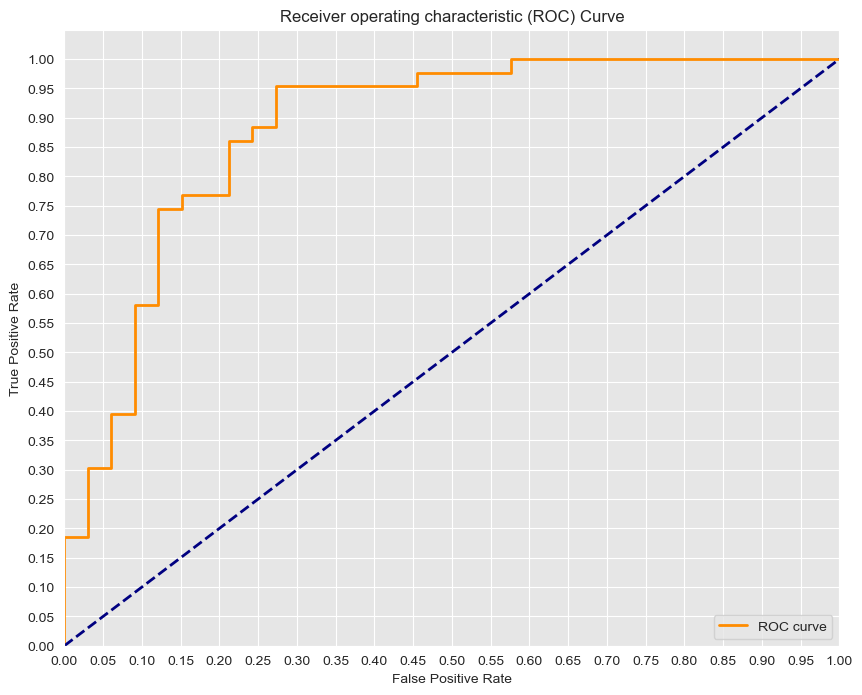

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Summary

In this lesson, we investigated another evaluation metric for classification algorithms (including logistic regression). Namely, the **Receiver Operating Characteristic** curve (ROC) which graphs the *False Positive Rate* against the *True Positive Rate*. The overall accuracy of a classifier can thus be quantified by the AUC, the **Area Under the Curve**. Perfect classifiers would have an AUC score of 1.0 while an AUC of 0.5 is deemed trivial or worthless. Next, you're going to get more practice graphing the ROC and AUC curves and making interpretations based on them.